In [ ]:
# Core Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from google.colab import drive

# Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, models  # For building the VGG16
from tensorflow.keras.applications import VGG16


# Data Visualization
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# OS and Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress unnecessary TensorFlow warnings


VGG16 Architecture and compiling the model

In [ ]:


# Load VGG16 model without the top layer (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Freeze the layers of the VGG16 model
base_model.trainable = False

# Build the model by adding custom layers
VGG16_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 output classes
])

# Compile the model
VGG16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Print model summary
VGG16_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,104,323 (88.14 MB)

 Trainable params: 8,389,635 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Training the vgg16 model

In [ ]:
EPOCHS = 10  # Adjust as needed

history_vgg = VGG16_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 482ms/step - accuracy: 0.7201 - loss: 17.8878 - val_accuracy: 0.9583 - val_loss: 0.5132
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 246ms/step - accuracy: 0.9566 - loss: 1.0209 - val_accuracy: 0.9896 - val_loss: 0.0111
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - accuracy: 0.9640 - loss: 0.3539 - val_accuracy: 0.9844 - val_loss: 0.1132
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.9732 - loss: 0.1796 - val_accuracy: 0.9896 - val_loss: 0.0452
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - accuracy: 0.9738 - loss: 0.1502 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.9758 - loss: 0.0759 - val_accuracy: 0.9740 - val_loss: 0.0860
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.9795 - loss: 0.0617 - val_accuracy: 0.9844 - val_loss: 0.0501
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.9823 - loss: 0.0648 - val_acc

Accuracy and Loss plot for VGG16 Model

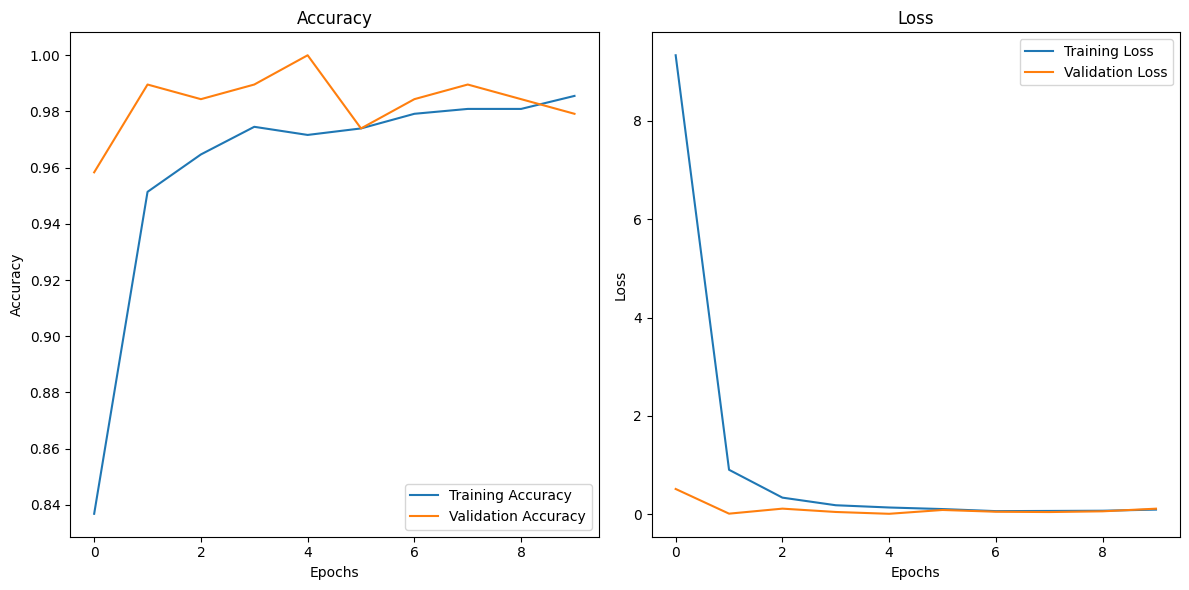

In [ ]:

# Plot accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Predictions

First image to predict:
Actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicted label: Potato___healthy


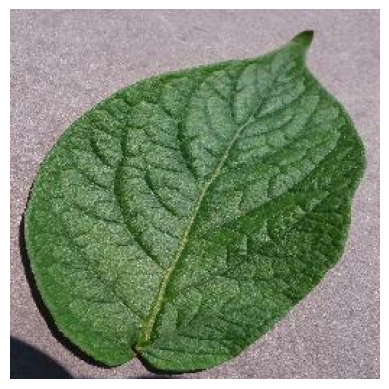

In [ ]:

import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")

    actual_index = np.argmax(first_label)  # since it's one-hot encoded
    print("Actual label:", class_names[actual_index])

    batch_prediction = VGG16_model.predict(images_batch)
    predicted_index = np.argmax(batch_prediction[0])
    print("Predicted label:", class_names[predicted_index])



Prediction a batch of Images

In [ ]:
def predict(VGG16_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    VGG16_predictions =VGG16_model.predict(img_array)

    VGG16_predicted_class = class_names[np.argmax(VGG16_predictions[0])]
    confidence = round(100 * (np.max(VGG16_predictions[0])), 2)
    return VGG16_predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


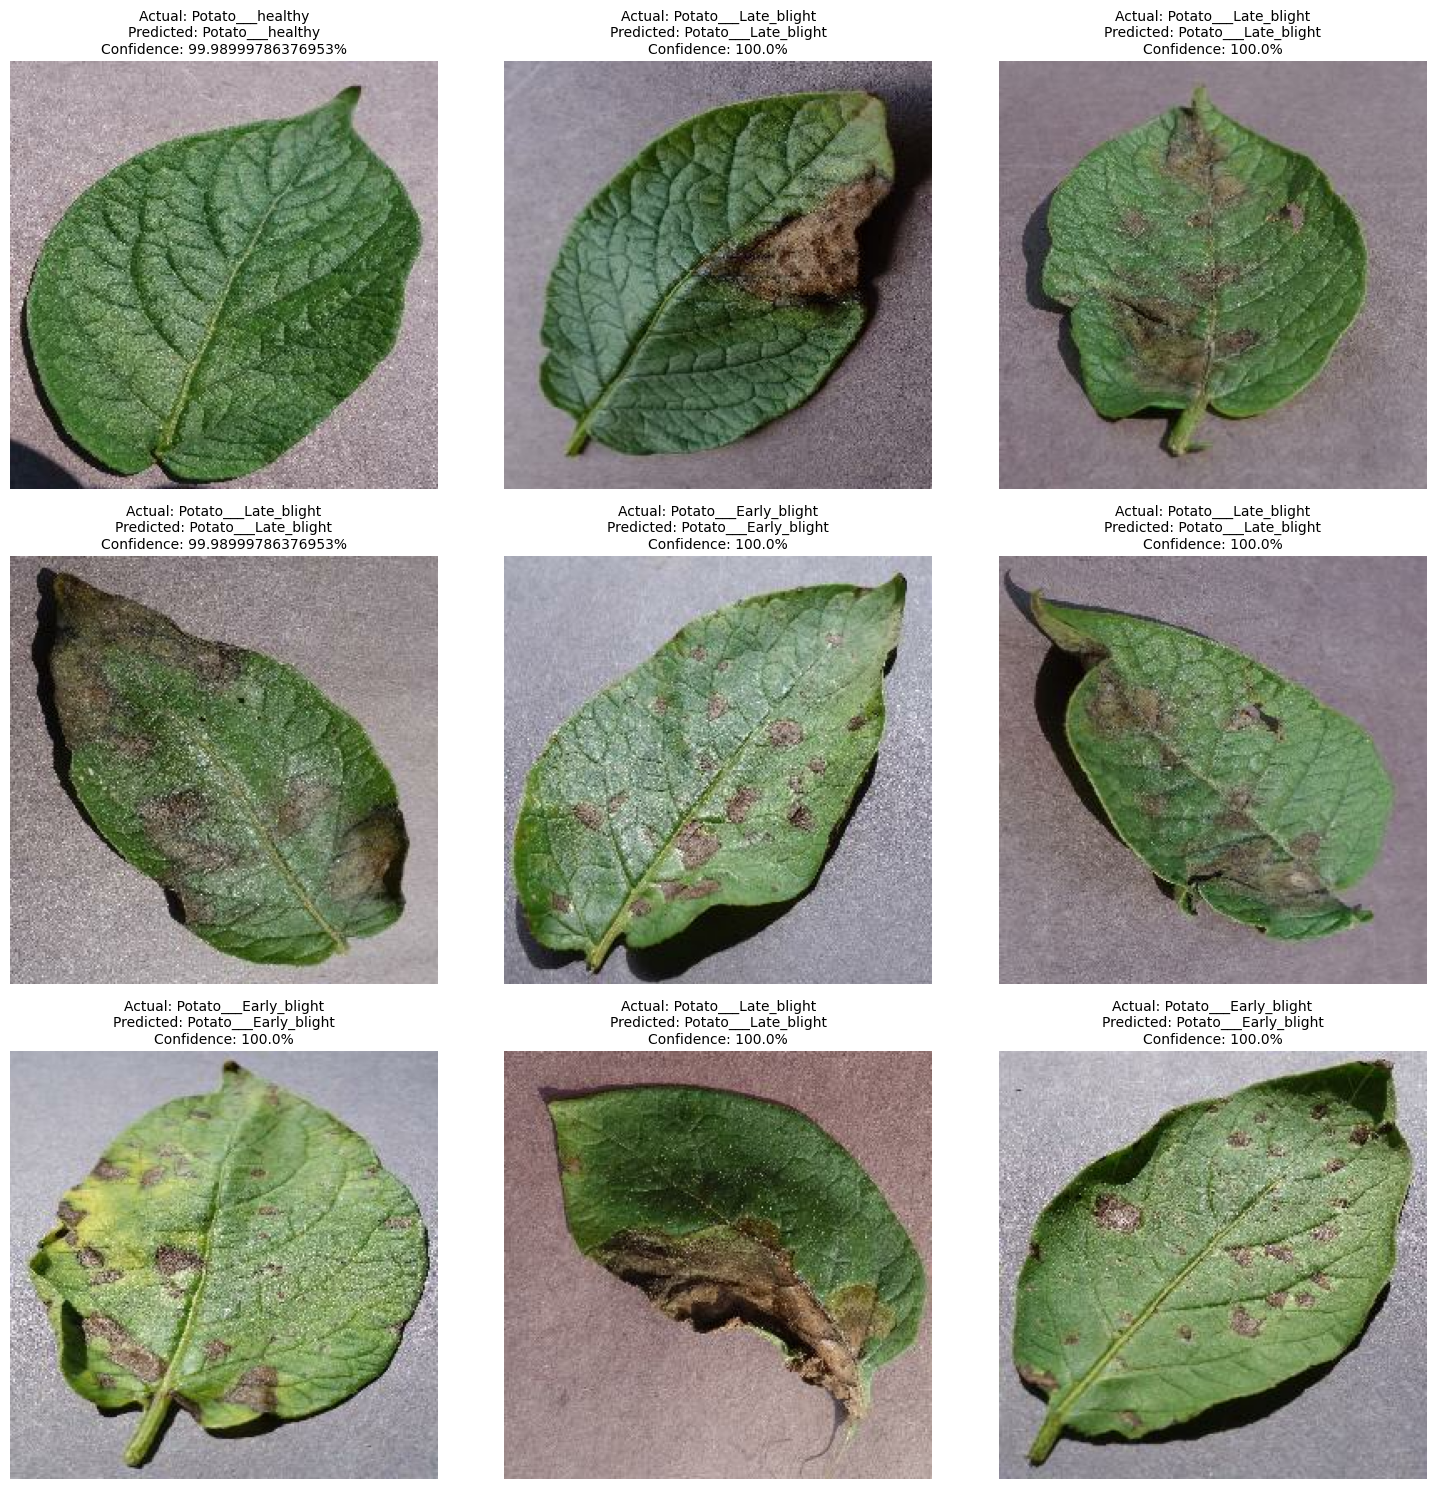

In [ ]:


plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        image_np = images[i].numpy().astype("uint8")
        plt.imshow(image_np)

        VGG16_predicted_class, confidence = predict(VGG16_model, image_np)
        actual_class = class_names[np.argmax(labels[i].numpy())]  # decode one-hot

        plt.title(f"Actual: {actual_class}\nPredicted: {VGG16_predicted_class}\nConfidence: {confidence}%", fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()





Evaluation- Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


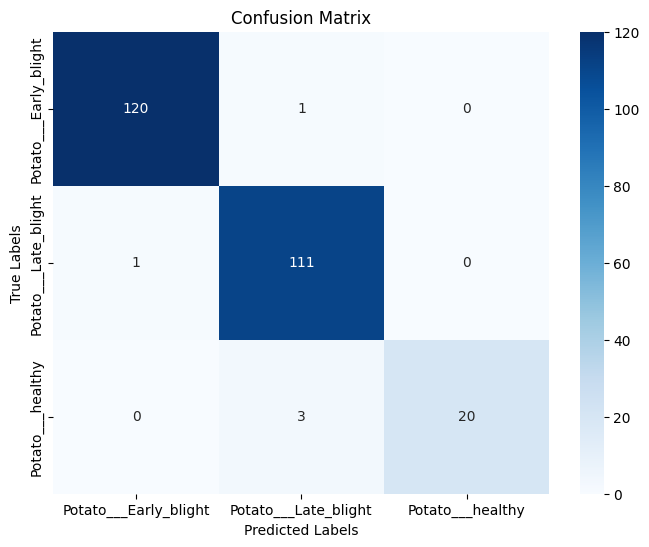

In [ ]:


# Initialize lists to store the true labels and predicted labels
y_true2 = []
y_pred2 = []

# Loop through the test dataset and get predictions
for images_batch, labels_batch in test_ds:
    # Predict labels using the model
    VGG16_batch_predictions = VGG16_model.predict(images_batch)
    VGG16_predicted_labels = np.argmax(VGG16_batch_predictions, axis=1)  # Get the predicted class labels (indices)

    # Convert one-hot encoded labels to class indices
    true_labels = np.argmax(labels_batch.numpy(), axis=1)



    # Append the true and predicted labels to the lists
    y_true2.extend(true_labels)
    y_pred2.extend(VGG16_predicted_labels)

# Compute confusion matrix
cm1 = confusion_matrix(y_true2, y_pred2)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




Evaluation Metrics

In [ ]:


# Calculate precision, recall, f1-score, and accuracy
precision = precision_score(y_true2, y_pred2, average='weighted')  # Change 'weighted' to 'micro' or 'macro' if needed
recall = recall_score(y_true2, y_pred2, average='weighted')
f1 = f1_score(y_true2, y_pred2, average='weighted')
accuracy = accuracy_score(y_true2, y_pred2)

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.9808763586956522
Recall: 0.98046875
F1 Score: 0.9801890175186968
Accuracy: 0.98046875


Saing the Model using .keras

In [ ]:
# Create a directory in Google Drive to save the model (optional)
VGG16_model_save_path = '/content/drive/MyDrive/ds_plantleaves_potato'  # Adjust the path as needed
os.makedirs(VGG16_model_save_path, exist_ok=True)

# Save the model
VGG16_model_version = 1
VGG16_model.save(os.path.join(VGG16_model_save_path, f'VGG16_model_{VGG16_model_version}.keras'))